In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm
import plotly.graph_objects as go

dimension de X:  (2, 100)
dimension de y:  (100,)


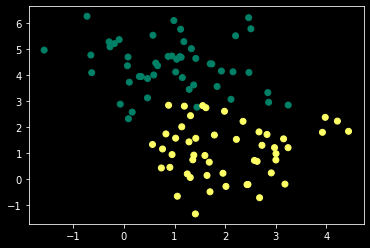

In [53]:
# X,y = make_circles(n_samples=1000, noise=0.15, factor=0.2, random_state=0)
X,y = make_blobs(n_samples=100, centers=2, n_features=2 ,random_state=0)
X= X.T
y = y.reshape((1,y.shape[0]))

print('dimension de X: ', X.shape)
print('dimension de y: ',Y.shape)

plt.scatter(X[0,:],X[1,:],c=y,cmap='summer')

In [54]:
print(y.shape)
y=np.zeros((100,3))
# print(Y)
j=0
for i in Y:
    y[j][i]=1
    j+=1
y.reshape(3,100)
print()

(1, 100)



In [55]:
def init(dim):
    C= len(dim)
    param={}
    for c in range(1,C):
        param['W'+str(c)] = np.random.randn(dim[c],dim[c-1])
        param['b'+str(c)] = np.random.randn(dim[c],1)
    return param

In [56]:
def forward_propagation(X,param):
    activation = {'A0' : X}
    C = len(param)//2
    for c in range(1,C+1):
        Z = param['W'+str(c)].dot(activation['A'+str(c-1)]) + param['b'+str(c)]
        activation['A'+str(c)] = 1 / (1 + np.exp(-Z))
    return activation

In [57]:
def contour(param):
    h = 100
    W1 = np.linspace(X[0].min(),X[0].max(),h)
    W2 = np.linspace(X[1].min(),X[1].max(),h)
    # W3 = np.linspace(X[2].min(),X[2].max(),h)
    W11, W22 = np.meshgrid(W1,W2)

    W_Final = np.c_[W11.ravel(),W22.ravel()].T

    Z = (predict(W_Final,param)+0).reshape(W11.shape)

    return W11,W22,Z

In [58]:
def back_propagation(y,activation,param ):
    m = y.shape[1]
    C = len(param)//2
    gradients = {}
    dZ = activation['A'+str(C)] - y

    for c in reversed(range(1,C+1)):
        gradients['dW'+str(c)] = 1/m * dZ.dot(activation['A'+str(c-1)].T)
        gradients['db'+str(c)] = 1/m * np.sum(dZ, axis=1,keepdims=True)
        if c>1:
            dZ = np.dot(param['W'+str(c)].T,dZ) * activation['A'+str(c-1)] * (1 - activation['A'+str(c-1)])

    return gradients

In [59]:
def update(gradients,param,lr):

    C = len(param)//2
    for c in range(1,C):
        param['W'+str(c)] = param['W'+str(c)] - lr* gradients['dW'+str(c)]
        param['b'+str(c)] = param['b'+str(c)] - lr* gradients['db'+str(c)]

    return param

In [60]:
def predict(X, param):
    activation = forward_propagation(X,param)
    C = len(param)//2
    a = activation['A'+str(C)]
    return a>0.5

In [61]:
def neural_network(X,y,hidden_layer,lr=0.1,n_iter=1000): #n1 nombre d neurones de la couche 1
    #init W,b
    dimensions=list(hidden_layer)
    dimensions.insert(0,X.shape[0])
    dimensions.append(y.shape[0])
    np.random.seed(0)
    param = init(dimensions)
    
    history = []
    train_Loss = []
    train_acc = []

    
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X,param)
        gradients = back_propagation( y, activations, param)
        param = update(gradients, param, lr)
        # Err.append(log_Error(a,y))
        if i%10 ==0:
            C =len(param)//2
            train_Loss.append(log_loss(y,activations['A'+str(C)]))
            y_pred = predict(X,param)
            current_accuracy = accuracy_score(y.flatten(),y_pred.flatten())
            train_acc.append(current_accuracy)
            # history.append([param.copy(), train_Loss, train_acc, i])
        
    
    W11,W22,Z = contour(param)
    # print(W11.shape,Z)
    plt.figure(figsize=(18,4))
    plt.subplot(131)
    plt.plot(train_Loss,label='Train Loss',c='y')
    plt.legend()
    plt.subplot(132)
    plt.plot(train_acc, label='Train Accuracy', c='y')
    plt.legend()
    plt.subplot(133)
    plt.scatter(X[0,:],X[1,:],c=y,cmap='winter')
    plt.contour(W11,W22,Z,10,alpha=0.9,color='Blues')
    # plt.colorbar()
    plt.show()
    
    # print(a.shape,a)
    return param

100%|██████████| 400/400 [00:00<00:00, 968.89it/s] 
/var/folders/vw/2g_98rts7tzczmvh5hqt_qn00000gn/T/ipykernel_20780/3009068850.py:39: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(W11,W22,Z,10,alpha=0.9,color='Blues')


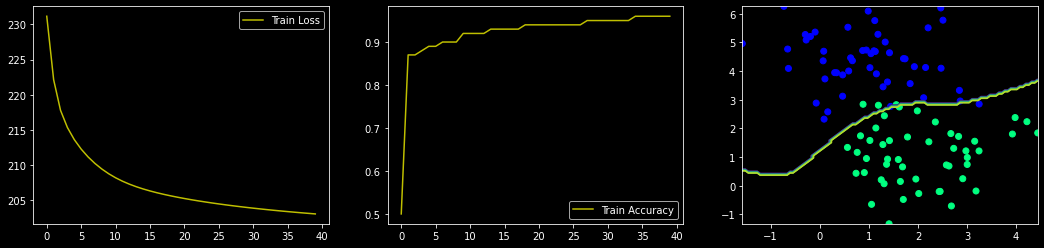

In [51]:
W_param = neural_network(X,y,[64,64,64],lr=0.05,n_iter=400)
# print (W_param)

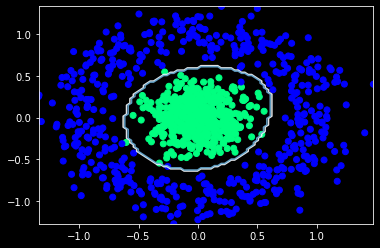

In [253]:
lim = 6
h = 100
W1 = np.linspace(X[0].min(),X[0].max(),h)
W2 = np.linspace(X[1].min(),X[1].max(),h)
W11, W22 = np.meshgrid(W1,W2)

W_Final = np.c_[W11.ravel(),W22.ravel()].T

Z = (predict(W_Final,W_param)).reshape(W11.shape)

# plt.contourf(W11,W22,E,20, cmap='magma')
plt.scatter(X[0,:],X[1,:],c=y,cmap='winter')
plt.contour(W11,W22,Z,1, cmap='Blues',alpha=0.9)
# plt.colorbar()

In [217]:
X.shape
y.shape

(1, 100)